In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from twython import Twython
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im
import json
from stop_words import get_stop_words
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('perluniprops')
nltk.download('nonbreaking_prefixes')
from nltk.tokenize.toktok import ToktokTokenizer
toktok = ToktokTokenizer()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ingridarmas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     /Users/ingridarmas/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /Users/ingridarmas/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!


In [76]:
df=pd.read_csv("tweets_metrocdmx.csv")
df.head()

,Unnamed: 0,date,hour,tweet
0,0,06/Nov/2019,19:31:36,El @MetroCDMX lleno de vendedores... En la est...
1,1,06/Nov/2019,19:32:20,Q paso @MetroCDMX en barranca ninguna de tus e...
2,2,06/Nov/2019,19:32:35,🔴 #EnDirecto Si estás por abordar la estación ...
3,3,06/Nov/2019,19:32:50,@MetroCDMX Felicitaciones a la persona que uti...
4,4,06/Nov/2019,19:33:04,Mi estimado @MetroCDMX que sucede en L8 direcc...


In [77]:
tweet = ''
for tweets in df["tweet"]:
    tweet+=tweets+" "

words=toktok.tokenize(tweet)


In [78]:
stop_words = get_stop_words('spanish')
words = [w for w in words if w[0]!="@"]
#acents
words = [w.replace("ó","o") for w in words]
words = [w.replace("ú","u") for w in words]
words = [w.replace("á","a") for w in words]
words = [w.replace("é","e") for w in words]
words = [w.replace("í","i") for w in words]

words = [w.replace("#","") for w in words]
words = [w.replace("...","") for w in words]
words = [w.replace(".","") for w in words]
words = [w for w in words if "http" not in w]
words = [w for w in words if len(w) > 2]  # ignore a, an, be, ...
words = [w.lower() for w in words]
words

['lleno',
 'vendedores',
 'estacion',
 'cuatro',
 'caminos',
 'hay',
 'tres',
 'cuatro',
 'por',
 'vagon',
 'nadie',
 'intenta',
 'siquiera',
 'detenerlos',
 'refiero',
 'autoridad',
 'paso',
 'barranca',
 'ninguna',
 'tus',
 'escaleras',
 'sirve',
 'personas',
 'tercera',
 'edad',
 'apenas',
 'pueden',
 'subir',
 'algo',
 'chinguen',
 'endirecto',
 'estas',
 'por',
 'abordar',
 'estacion',
 'tacuba',
 'linea7',
 'del',
 'encontraras',
 'buen',
 'ambiente',
 'ska',
 'telediarioenel6',
 '&124;',
 'felicitaciones',
 'persona',
 'que',
 'utilizo',
 'cerebro',
 'beneficio',
 'quien',
 'necesita',
 'era',
 'increible',
 'que',
 'pudieran',
 'usar',
 'sin',
 'una',
 'tarjeta',
 'que',
 'servia',
 'para',
 'nada',
 'estimado',
 'que',
 'sucede',
 'direccion',
 'garibaldi',
 'que',
 'muy',
 'lenta?',
 'tardando',
 'demasiado',
 'direccion',
 'garibaldi',
 'bien',
 'asta',
 'que',
 'asen',
 'algo',
 'bueno',
 'iba',
 'con',
 'novio',
 'respetamos',
 'vagon',
 'exclusivo',
 'aun',
 'asi',
 'debe

In [79]:
Linea_1=['linea1','linea 1','l1','1','linea rosa','rosa','rosada']
Linea_2=['linea2','linea 2','l2','2','linea azul','azul']
Linea_3=['linea3','linea 3','l3','3','linea verde olivo','verde olivo']
Linea_4=['linea4','linea 4','l4','4','linea cian','cian']
Linea_5=['linea5','linea 5','l5','5','linea amarillo','linea amarilla','amarillo','amarilla']
Linea_6=['linea6','linea 6','l6','6','linea rojo','linea roja','roja','rojo']
Linea_7=['linea7','linea 7','l7','7','linea naranja','naranja']
Linea_8=['linea8','linea 8','l8','8','linea verde','verde']
Linea_9=['linea9','linea 9','l9','9','linea cafe','cafe']
Linea_A=['lineaA','linea A','lA','A','linea morado','linea morada','morada','morado']
Linea_B=['lineaB','linea B','lB','B','linea verde-gris','verde-gris']
Linea_12=['linea12','linea 12','l12','12','linea oro','oro','linea dorada','dorada']

#Lowercase and with out puntation in all words
L1_E1=['pantitlan','panti']
L1_E2=['zaragoza']
L1_E3=['gomez farias','gomez','farias']
L1_E4=['boulevard puerto aereo','boulevard','puerto','aereo']
L1_E5=['balbuena']
L1_E6=['moctezuma']
L1_E7=['san lazaro','lazaro','lasaro','sanlasaro','sanlazaro']
L1_E8=['candelaria']
L1_E9=['merced']
L1_E10=['pino suarez','pino','suarez','pinosuarez','suares','pinosuares']
L1_E11=['isabel la catolica','isabel','catolica','isabellacatolica']
L1_E12=['salto del agua','salto','agua','salto agua','saltodeagua','saltoagua']
L1_E13=['balderas']
L1_E14=['cuauhtemoc']
L1_E15=['insurgentes']
L1_E16=['sevilla']
L1_E17=['chapultepec','chapu']
L1_E18=['juanacatlam']
L1_E19=['tacubaya']
L1_E20=['observatorio']

L2_E1=['cuatro caminos','caminos']
L2_E2=['panteones']
L2_E3=['tacuba']
L2_E4=['cuitlahuac']
L2_E5=['popotal']
L2_E6=['colegio militar','colegio','militar']
L2_E7=['normal']
L2_E8=['san cosme','cosme']
L2_E9=['revolucion']
L2_E10=['hidalgo']
L2_E11=['bellas artes','bellas','artes']
L2_E12=['allende']
L2_E13=['zocalo']
L2_E14=['pino suarez','pino','suarez']
L2_E15=['san antonio abad','antonio','abad']
L2_E16=['cabacano']
L2_E17=['viaducto']
L2_E18=['xola']
L2_E19=['villa de cortes','villa','cortes']
L2_E20=['nativitas']
L2_E21=['portales']
L2_E22=['ermita']
L2_E23=['general anaya','general','anaya']
L2_E24=['tasqueña','taxqueña']

L3_E1=['indios verdes','indios','verdes']
L3_E2=['deportivo 18 de marzo']
L3_E3=['potrero']
L3_E4=['la raza','raza']
L3_E5=['tlatelolco']
L3_E6=['guerrero']
L3_E7=['hidalgo']
L3_E8=['juarez']
L3_E9=['balderas']
L3_E10=['niños heroes','niños','ninos','heroes']
L3_E11=['hospital general','hospital','general']
L3_E12=['centro medico','medico','centro']
L3_E13=['etiopia plaza de la transparencia', 'etiopia','transparencia']
L3_E14=['eugenia']
L3_E15=['division del norte','division']
L3_E16=['zapata']
L3_E17=['coyoacan']
L3_E18=['viveros derechos humanos','viveros','derechos','humanos']
L3_E19=['miguel angel de quevedo','miguel','angel','quevedo']
L3_E20=['copilco']
L3_E21=['universidad']

L4_E1=['martin carrera', 'martin','carrera']
L4_E2=['talisman']
L4_E3=['bondojito']
L4_E4=['consulado']
L4_E5=['canal del norte','canal','norte']
L4_E6=['morelos']
L4_E7=['candelaria']
L4_E8=['fray servando','fray','servando']
L4_E9=['jamaica']
L4_E10=['santa anita','santa','anita']

L5_E1=['pantitlan']
L5_E2=['hangares']
L5_E3=['terminal aerea','terminal','area']
L5_E4=['oceania']
L5_E5=['aragon']
L5_E6=['eduardo molina']
L5_E7=['consulado']
L5_E8=['valle gomez']
L5_E9=['misterios']
L5_E10=['la raza','raza']
L5_E11=['autobuses del norte', 'autobuses']
L5_E12=['instituto del petroleo']
L5_E13=['politecnico']

L6_E1=['el rosario','rosario']
L6_E2=['tezozomoc']
L6_E3=['uam-azcapotzalco','uam','azcapotzalco']
L6_E4=['ferreria','arena ciudad de mexico','ferreria arena ciudad de mexico']
L6_E5=['norte 45','norte45']
L6_E6=['vallejo']
L6_E7=['instituto del petroleo']
L6_E8=['lindavista']
L6_E9=['deportivo 18 de marzo']
L6_E10=['la villa-basilica','la villa','villa','basilica']
L6_E11=['martin carrera', 'martin','carrera']

L7_E1=['el rosario','rosario']
L7_E2=['aquiles serdan','aquiles','serdan']
L7_E3=['camarones']
L7_E4=['refineria']
L7_E5=['tacuba']
L7_E6=['san joaquin','joaquin']
L7_E7=['polanco']
L7_E8=['auditoria']
L7_E9=['constituyentes']
L7_E10=['tacubaya']
L7_E11=['san pedro de los pinos','pedro de los pinos','pinos']

L8_E1=['garabildi-lagunillina','garibaldi','lagunilla']
L8_E2=['bellas artes','bellas','artes']
L8_E3=['san juan de letran', 'juan','letran']
L8_E4=['salto del agua','salto','agua']
L8_E5=['doctores']
L8_E6=['obrera']
L8_E7=['chabacano']
L8_E8=['la viga','viga']
L8_E9=['santa anita']
L8_E10=['coyuya']
L8_E11=['iztacalco']
L8_E12=['apatlaco']
L8_E13=['aculco']
L8_E14=['escuadron 201','escuadron']
L8_E15=['atalilco']
L8_E16=['iztapalapa']
L8_E17=['cerro de la estrella','cerro','estrella']
L8_E18=['uam-i','uami']
L8_E19=['constitucion de 1917','cosntitucion','1971']

L9_E1=['pantitlan']
L9_E2=['puebla']
L9_E3=['ciudad deportiva','desportiva']
L9_E4=['velodromo']
L9_E5=['mixiuhca']
L9_E6=['jamaica']
L9_E7=['chabacano']
L9_E8=['lazaro cardenas','lazaro','cardenas']
L9_E9=['centro medico','centro','medico']
L9_E10=['chilpancingo']
L9_E11=['patriotismo']
L9_E12=['tacubaya']

LA_E1=['pantitlan']
LA_E2=['agricola oriental']
LA_E3=['canal de san juan']
LA_E4=['tepalcates']
LA_E5=['guelatao']
LA_E6=['peñon viejo','penon','viejo']
LA_E7=['acatitlan']
LA_E8=['santa marta','santamarta','santamartha','santa martha']
LA_E9=['los reyes','reyes']
LA_E10=['la paz','paz']

LB_E1=['buenavista']
LB_E2=['guerrero']
LB_E3=['garibaldi-lagunilla','garibaldilagunilla']
LB_E4=['lagunilla']
LB_E5=['tepito','tepis','tpito']
LB_E6=['morelos']
LB_E7=['san lazaro','lazaro','lasaro','san lasaro']
LB_E8=['ricardo flores magon','ricardo','flores','magon']
LB_E9=['romero','rubio','romerorubio']
LB_E10=['oceania']
LB_E11=['deportivo oceania','deportivooceania']
LB_E12=['bosque de aragon','bosquedearagon']
LB_E13=['villa de aragon','villadearagon']
LB_E14=['nezahualcoyotl','neza']
LB_E15=['impulsora']
LB_E16=['rio de los remedios','remedios']
LB_E17=['muzquiz']
LB_E18=['ecatepec']
LB_E19=['olimpica']
LB_E20=['plaza aragon','plazaaragon']
LB_E21=['ciudad azteca','ciudadazteca']

L12_E1=['tlahuac']
L12_E2=['tlaltengo']
L12_E3=['zapotitlan']
L12_E4=['nopalera']
L12_E5=['olivos']
L12_E6=['tezonco']
L12_E7=['periferico oriente','periferico','oriente', 'perifericooriente']
L12_E8=['calle 11','calle11']
L12_E9=['lomas estrella','lomas','estrella']
L12_E10=['san andres tomatlan','tomatlan']
L12_E11=['culhuacan']
L12_E12=['atlalilco']
L12_E13=['mexicaltzingo']
L12_E14=['ermita']
L12_E15=['eje central']
L12_E16=['parque de los venados', 'venados']
L12_E17=['zapata']
L12_E18=['hospital 20 de noviembre','hospital','20nov','hospital 20nov']
L12_E19=['insurgentes sur']
L12_E20=['mixcoac']

lineas=['1','2','3','4','5','6','7','8','9','A','B','12']
dic={}
for i in lineas:
    dic["L"+i+"_Estaciones"]={}
    dic["L"+i+"_Estaciones"]["Estaciones"] = []

i=0
for key,value in dic.items():
    for k in range(23):
        dic[key]["Nombre"]=vars()['Linea_'+lineas[i]]
        
        try:
            dic[key]["Estaciones"]+=vars()['L'+lineas[i]+"_E"+str(k+1)]
    
        except:
            pass
    i+=1 
    
Todo=dic["L1_Estaciones"]["Estaciones"]+dic["L2_Estaciones"]["Estaciones"]+dic["L3_Estaciones"]["Estaciones"]+dic["L4_Estaciones"]["Estaciones"]+dic["L5_Estaciones"]["Estaciones"]+dic["L6_Estaciones"]["Estaciones"]+dic["L7_Estaciones"]["Estaciones"]+dic["L8_Estaciones"]["Estaciones"]+dic["L9_Estaciones"]["Estaciones"]+dic["LA_Estaciones"]["Estaciones"]+dic["LB_Estaciones"]["Estaciones"]+dic["L12_Estaciones"]["Estaciones"]+dic["L1_Estaciones"]["Nombre"]+dic["L2_Estaciones"]["Nombre"]+dic["L3_Estaciones"]["Nombre"]+dic["L4_Estaciones"]["Nombre"]+dic["L5_Estaciones"]["Nombre"]+dic["L6_Estaciones"]["Nombre"]+dic["L7_Estaciones"]["Nombre"]+dic["L8_Estaciones"]["Nombre"]+dic["L9_Estaciones"]["Nombre"]+dic["LA_Estaciones"]["Nombre"]+dic["LB_Estaciones"]["Nombre"]+dic["L12_Estaciones"]["Nombre"]
Todo



['pantitlan',
 'panti',
 'zaragoza',
 'gomez farias',
 'gomez',
 'farias',
 'boulevard puerto aereo',
 'boulevard',
 'puerto',
 'aereo',
 'balbuena',
 'moctezuma',
 'san lazaro',
 'lazaro',
 'lasaro',
 'sanlasaro',
 'sanlazaro',
 'candelaria',
 'merced',
 'pino suarez',
 'pino',
 'suarez',
 'pinosuarez',
 'suares',
 'pinosuares',
 'isabel la catolica',
 'isabel',
 'catolica',
 'isabellacatolica',
 'salto del agua',
 'salto',
 'agua',
 'salto agua',
 'saltodeagua',
 'saltoagua',
 'balderas',
 'cuauhtemoc',
 'insurgentes',
 'sevilla',
 'chapultepec',
 'chapu',
 'juanacatlam',
 'tacubaya',
 'observatorio',
 'cuatro caminos',
 'caminos',
 'panteones',
 'tacuba',
 'cuitlahuac',
 'popotal',
 'colegio militar',
 'colegio',
 'militar',
 'normal',
 'san cosme',
 'cosme',
 'revolucion',
 'hidalgo',
 'bellas artes',
 'bellas',
 'artes',
 'allende',
 'zocalo',
 'pino suarez',
 'pino',
 'suarez',
 'san antonio abad',
 'antonio',
 'abad',
 'cabacano',
 'viaducto',
 'xola',
 'villa de cortes',
 'vill

In [80]:
not_included=['dias','mas','quiere','dia','trabajo','tambien','llevan','sección','vayamos','llevaba','llevaban','perrito','capa','línea7','cuatro','pues','paren','buenas','tardes','noches','dias','buena','tarde','noche','viaje','trenes','movilidadcdmx','metrocdmx','ucs_gcdmx']
stop_words = stop_words + not_included#+Todo
words = [w for w in words if w not in stop_words]
len(words)

6869

In [81]:
mask = np.array(Image.open('/Users/ingridarmas/Downloads/metro.png'))

In [82]:
wc = WordCloud(background_color="white", max_words=2000, mask=mask,collocations=False)
clean_string = ','.join(words)
wc.generate(clean_string)


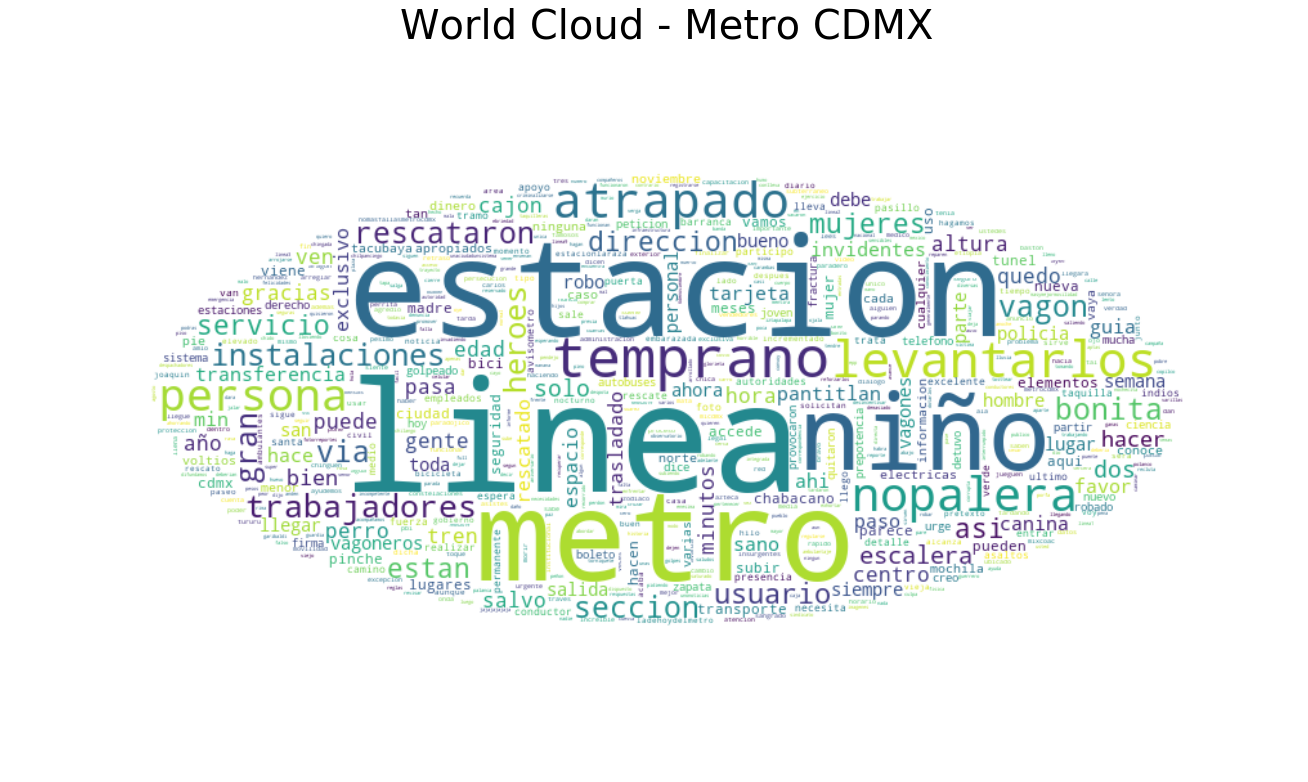

In [83]:
f = plt.figure(figsize=(50,50))

#f.add_subplot(1,2, 1)

#plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
#plt.title('Original Stencil', size=40)
#plt.axis("off")

f.add_subplot(1,2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.title('World Cloud - Metro CDMX', size=40)
plt.axis("off")

plt.show()


In [84]:
wc.to_file('N.png')